In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
!pip install yfinance
import yfinance as yf

df = yf.download('AAPL', 
                      start='2019-03-31', 
                      end='2021-03-31', 
                      progress=False,
                      date_parser = True)

     |████████████████████████████████| 5.5MB 13.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=e36001a37b311d0b84fcc4aa43464a5abef341b64b580cb3aeadd15fe6a7532a
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,47.910000,47.919998,47.095001,47.810001,46.829304,111448000
2019-04-02,47.772499,48.615002,47.762501,48.505001,47.510036,91062800
2019-04-03,48.312500,49.125000,48.287498,48.837502,47.835732,93087200
2019-04-04,48.697498,49.092499,48.285000,48.922501,47.918972,76457200
2019-04-05,49.112499,49.275002,48.982498,49.250000,48.239758,74106400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2019-04-01 to 2021-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [5]:
del df['Adj Close']



In [6]:
training= df.iloc[:-31,:].copy()
test= df.iloc[-31:,:].copy()

test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2021-02-16 to 2021-03-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    31 non-null     float64
 1   High    31 non-null     float64
 2   Low     31 non-null     float64
 3   Close   31 non-null     float64
 4   Volume  31 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


In [7]:
scaler = MinMaxScaler()
training = scaler.fit_transform(training)
training[:10]

array([[0.04060556, 0.03419142, 0.04582374, 0.04492413, 0.17302998],
       [0.03922697, 0.04109932, 0.05257964, 0.05188561, 0.11958678],
       [0.04464106, 0.04616838, 0.05789325, 0.05521611, 0.12489408],
       [0.04850108, 0.04584534, 0.05786796, 0.05606751, 0.08129577],
       [0.0526619 , 0.0476593 , 0.06492748, 0.05934791, 0.07513276],
       [0.05258671, 0.05543683, 0.06596491, 0.06711074, 0.15226323],
       [0.06236215, 0.06194714, 0.07327748, 0.06560824, 0.25593965],
       [0.05825143, 0.05670412, 0.07062066, 0.06841286, 0.10836186],
       [0.0636906 , 0.05735017, 0.07127856, 0.06423096, 0.1000302 ],
       [0.05955483, 0.0552132 , 0.065636  , 0.06403063, 0.17196768]])

In [8]:
X_train=[]
y_train =[]

for i in range(60, training.shape[0]):
    X_train.append(training[i-60:i])
    y_train.append(training[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train[:10]

array([[[0.04060556, 0.03419142, 0.04582374, 0.04492413, 0.17302998],
        [0.03922697, 0.04109932, 0.05257964, 0.05188561, 0.11958678],
        [0.04464106, 0.04616838, 0.05789325, 0.05521611, 0.12489408],
        ...,
        [0.05855223, 0.05697746, 0.07054475, 0.06380527, 0.3821194 ],
        [0.05790052, 0.05526291, 0.07059537, 0.06330445, 0.07192174],
        [0.0576248 , 0.05302653, 0.06330809, 0.05576702, 0.10180769]],

       [[0.03922697, 0.04109932, 0.05257964, 0.05188561, 0.11958678],
        [0.04464106, 0.04616838, 0.05789325, 0.05521611, 0.12489408],
        [0.04850108, 0.04584534, 0.05786796, 0.05606751, 0.08129577],
        ...,
        [0.05790052, 0.05526291, 0.07059537, 0.06330445, 0.07192174],
        [0.0576248 , 0.05302653, 0.06330809, 0.05576702, 0.10180769],
        [0.05597052, 0.05732534, 0.06852054, 0.06635949, 0.15421165]],

       [[0.04464106, 0.04616838, 0.05789325, 0.05521611, 0.12489408],
        [0.04850108, 0.04584534, 0.05786796, 0.05606751, 0.0

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout


In [29]:

model = Sequential()

model.add(LSTM(units = 31, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(X_train,y_train,epochs=5, batch_size=32)

Epoch 1/5
13/13 [==============================] - 6s 134ms/step - loss: 0.2134
Epoch 2/5
13/13 [==============================] - 2s 136ms/step - loss: 0.0279
Epoch 3/5
13/13 [==============================] - 2s 139ms/step - loss: 0.0153
Epoch 4/5
13/13 [==============================] - 2s 135ms/step - loss: 0.0081
Epoch 5/5
13/13 [==============================] - 2s 132ms/step - loss: 0.0077


In [35]:
inputs= scaler.transform(df)

In [36]:

X_test = []
y_test = []

for i in range(31, inputs.shape[0]):
    X_test.append(inputs[i-31:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)


(473, 31, 5)


In [37]:
prediction= model.predict(X_test)

In [41]:
rescale= 1/scaler.scale_[0]
y_test= y_test* rescale
prediction*= rescale

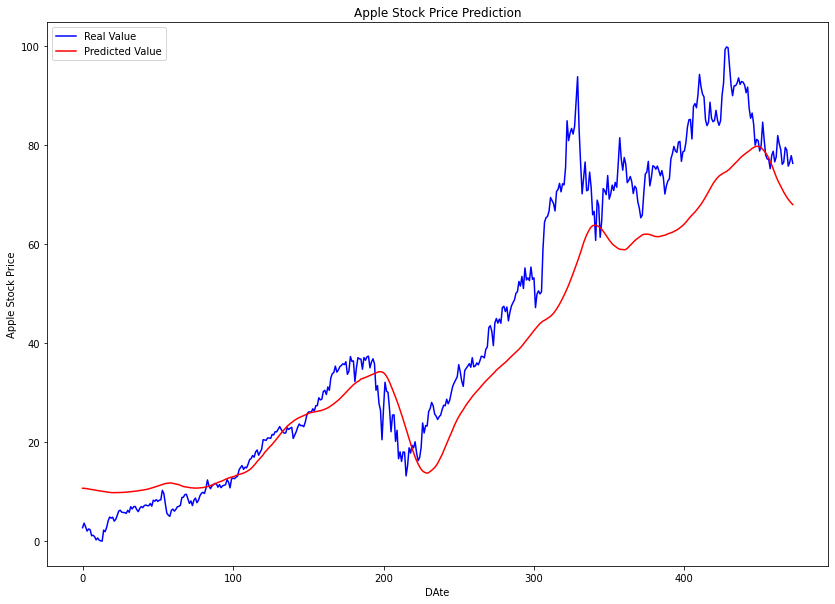

In [47]:
plt.figure(figsize=(14,10))
plt.plot(y_test,color='blue',label= 'Real Value')
plt.plot(prediction,color='red',label='Predicted Value')
plt.title('Apple Stock Price Prediction')
plt.xlabel('DAte')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [51]:
for i in range(130,137):
  print((y_test[i]-prediction[i])*100/y_test[i])

[6.7692733]
[7.183118]
[3.1189404]
[-0.53564835]
[-3.2355201]
[-4.6351876]
[-1.406285]
